### Factbook Database from CIA

https://github.com/factbook/factbook.sql

```
CREATE TABLE "facts" (
  "id" INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
  "code" varchar(255) NOT NULL,
  "name" varchar(255) NOT NULL,
  
  ---------------------------------------
  -- Geography
  "area"       integer,
  "area_land"  integer,
  "area_water" integer,
  
  ----------------------------------------
  -- People and Society
  "population"        integer,
  "population_growth" float,
  "birth_rate"        float,
  "death_rate"        float,
  "migration_rate"    float,
  
  --------------------------------
  -- Timestamp
  "created_at" datetime,
  "updated_at" datetime
)
```

### SELECT / WHERE

```
SELECT column_name(s)
FROM table_name
WHERE condition AND|OR condition
```

In [1]:
import sqlite3
import pandas as pd

conn = sqlite3.connect("factbook.db")
facts = pd.read_sql_query("SELECT * FROM facts;",conn)
facts.head(5)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,1,af,Afghanistan,652230.0,652230.0,0.0,32564342.0,2.32,38.57,13.89,1.51,2015-11-01 13:19:49.461734,2015-11-01 13:19:49.461734
1,2,al,Albania,28748.0,27398.0,1350.0,3029278.0,0.30,12.92,6.58,3.30,2015-11-01 13:19:54.431082,2015-11-01 13:19:54.431082
2,3,ag,Algeria,2381741.0,2381741.0,0.0,39542166.0,1.84,23.67,4.31,0.92,2015-11-01 13:19:59.961286,2015-11-01 13:19:59.961286
3,4,an,Andorra,468.0,468.0,0.0,85580.0,0.12,8.13,6.96,0.00,2015-11-01 13:20:03.659945,2015-11-01 13:20:03.659945
4,5,ao,Angola,1246700.0,1246700.0,0.0,19625353.0,2.78,38.78,11.49,0.46,2015-11-01 13:20:08.625072,2015-11-01 13:20:08.625072


### Αριθμός γραμμών

In [2]:
facts.shape

(261, 13)

### Ερώτημα με συγκεκριμένες στήλες

```
SELECT name, population 
FROM facts
```

In [4]:
facts = pd.read_sql_query("SELECT name, population,birth_rate FROM facts;",conn)
facts.head(5)

,name,population,birth_rate
0,Afghanistan,32564342.0,38.57
1,Albania,3029278.0,12.92
2,Algeria,39542166.0,23.67
3,Andorra,85580.0,8.13
4,Angola,19625353.0,38.78


### Ή με συγκεκριμένες γραμμές

```
SELECT name, population 
FROM facts 
WHERE population > 50000000
```

In [5]:
pd.read_sql_query("SELECT name, population FROM facts WHERE population > 50000000;",conn)

,name,population
0,Bangladesh,168957745
1,Brazil,204259812
2,Burma,56320206
3,China,1367485388
4,"Congo, Democratic Republic of the",79375136
5,Egypt,88487396
6,Ethiopia,99465819
7,France,66553766
8,Germany,80854408
9,India,1251695584


```
SELECT name, population 
FROM facts 
WHERE population BETWEEN 10000000 AND 20000000
```

In [6]:
pd.read_sql_query("SELECT name, population FROM facts WHERE population BETWEEN 10000000 AND 20000000;",conn)

,name,population
0,Angola,19625353
1,Belgium,11323973
2,Benin,10448647
3,Bolivia,10800882
4,Burkina Faso,18931686
5,Burundi,10742276
6,Cambodia,15708756
7,Chad,11631456
8,Chile,17508260
9,Cuba,11031433


```
SELECT name, population 
FROM facts 
WHERE population IN (16955536,13975834,12042910)
```

In [8]:
pd.read_sql_query("SELECT name, population FROM facts WHERE population IN (1,2) ;",conn)

,name,population


```
SELECT name, population 
FROM facts 
WHERE name LIKE '%reec%'
```

In [10]:
pd.read_sql_query("SELECT name, population FROM facts WHERE name LIKE 'Gre%' ;",conn)

,name,population
0,Greece,10775643
1,Grenada,110694
2,Greenland,57733


### COUNT, MIN, MAX, SUM, AVG

```
SELECT COUNT(*) as TotalCountries 
FROM facts;
```

In [12]:
pd.read_sql_query("SELECT COUNT(*) as TotalCountries FROM facts;",conn)

,TotalCountries
0,261


```
SELECT name, MIN(population) As population 
FROM facts
```

In [15]:
pd.read_sql_query("SELECT name, MIN(population) As population FROM facts;",conn)

,name,population
0,Antarctica,0


```
SELECT SUM(population) As TotalPopulation 
FROM facts
```

In [16]:
pd.read_sql_query("SELECT SUM(population) As TotalPopulation FROM facts;",conn)

,TotalPopulation
0,15026972654


```
SELECT name, MAX(population) as population FROM facts
```

In [17]:
pd.read_sql_query("SELECT name, MAX(population) as population FROM facts;",conn)

,name,population
0,World,7256490011


```
SELECT SUM(population) As TotalPopulation 
FROM facts 
WHERE name NOT IN ('World', 'European Union')
```

In [18]:
pd.read_sql_query("SELECT SUM(population) As TotalPopulation FROM facts WHERE name NOT IN ('World', 'European Union');",conn)

,TotalPopulation
0,7256533198


```
SELECT AVG(population) 
FROM facts
```

In [19]:
pd.read_sql_query("SELECT AVG(population) FROM facts;",conn)

,AVG(population)
0,6.209493e+07


### LIMIT

```
SELECT column_name(s)
FROM table_name
WHERE condition AND|OR condition
LIMIT integer
```

In [20]:
pd.read_sql_query("SELECT name, population FROM facts LIMIT 10;",conn)

,name,population
0,Afghanistan,32564342
1,Albania,3029278
2,Algeria,39542166
3,Andorra,85580
4,Angola,19625353
5,Antigua and Barbuda,92436
6,Argentina,43431886
7,Armenia,3056382
8,Australia,22751014
9,Austria,8665550


### ORDER BY

```
SELECT column_name(s)
FROM table_name
WHERE condition AND|OR condition
ORDER BY column_name [ASC|DESC]
```

In [21]:
facts = pd.read_sql_query("SELECT name, population FROM facts ORDER BY population ASC;",conn)
facts.head(30)

,name,population
0,Ashmore and Cartier Islands,NaN
1,Coral Sea Islands,NaN
2,Heard Island and McDonald Islands,NaN
3,Clipperton Island,NaN
4,French Southern and Antarctic Lands,NaN
5,Bouvet Island,NaN
6,Jan Mayen,NaN
7,British Indian Ocean Territory,NaN
8,South Georgia and South Sandwich Islands,NaN
9,Navassa Island,NaN


```
SELECT name, population 
FROM facts 
WHERE population > 50000000 AND name != 'World' 
ORDER BY population DESC
```

In [22]:
pd.read_sql_query("SELECT name, population FROM facts WHERE population > 50000000 AND name != 'World' ORDER BY population DESC;",conn)

,name,population
0,China,1367485388
1,India,1251695584
2,European Union,513949445
3,United States,321368864
4,Indonesia,255993674
5,Brazil,204259812
6,Pakistan,199085847
7,Nigeria,181562056
8,Bangladesh,168957745
9,Russia,142423773


### DISTINCT

```
SELECT DISTINCT(column_name)
FROM table_name
WHERE condition AND|OR condition
```


In [23]:
pd.read_sql_query("SELECT DISTINCT(population_growth) FROM facts;",conn)

,population_growth
0,2.32
1,0.30
2,1.84
3,0.12
4,2.78
5,1.24
6,0.93
7,0.15
8,1.07
9,0.55


```
SELECT COUNT(DISTINCT(population_growth)) 
FROM facts
```

In [24]:
pd.read_sql_query("SELECT COUNT(DISTINCT(population_growth)) FROM facts;",conn)

,COUNT(DISTINCT(population_growth))
0,157


### Πράξεις

```
SELECT name, population/1000 
FROM facts
```

In [25]:
pd.read_sql_query("SELECT name, population/1000 FROM facts;",conn)

,name,population/1000
0,Afghanistan,32564.0
1,Albania,3029.0
2,Algeria,39542.0
3,Andorra,85.0
4,Angola,19625.0
5,Antigua and Barbuda,92.0
6,Argentina,43431.0
7,Armenia,3056.0
8,Australia,22751.0
9,Austria,8665.0


```
SELECT name, area, area_water, area_land, area_water + area_land 
FROM facts
```

In [26]:
pd.read_sql_query("SELECT name, area, area_water, area_land, area_water + area_land FROM facts;", conn)

,name,area,area_water,area_land,area_water + area_land
0,Afghanistan,652230.0,0.0,652230.0,652230.0
1,Albania,28748.0,1350.0,27398.0,28748.0
2,Algeria,2381741.0,0.0,2381741.0,2381741.0
3,Andorra,468.0,0.0,468.0,468.0
4,Angola,1246700.0,0.0,1246700.0,1246700.0
5,Antigua and Barbuda,442.0,0.0,442.0,442.0
6,Argentina,2780400.0,43710.0,2736690.0,2780400.0
7,Armenia,29743.0,1540.0,28203.0,29743.0
8,Australia,7741220.0,58920.0,7682300.0,7741220.0
9,Austria,83871.0,1426.0,82445.0,83871.0


In [27]:
conn.close()

## Chinook database

In [28]:
import sqlite3
import pandas as pd

conn = sqlite3.connect("chinook.db",isolation_level=None)
chinook = pd.read_sql_query("SELECT * FROM tracks;",conn)
chinook.head(5)

,TrackId,Name,AlbumId,MediaTypeId,GenreId,Composer,Milliseconds,Bytes,UnitPrice
0,1,For Those About To Rock (We Salute You),1,1,1,"Angus Young, Malcolm Young, Brian Johnson",343719,11170334,0.99
1,2,Balls to the Wall,2,2,1,None,342562,5510424,0.99
2,3,Fast As a Shark,3,2,1,"F. Baltes, S. Kaufman, U. Dirkscneider & W. Ho...",230619,3990994,0.99
3,4,Restless and Wild,3,2,1,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...",252051,4331779,0.99
4,5,Princess of the Dawn,3,2,1,Deaffy & R.A. Smith-Diesel,375418,6290521,0.99


In [29]:
chinook = pd.read_sql_query("SELECT * FROM customers;",conn)
chinook.head(5)

,CustomerId,FirstName,LastName,Company,Address,City,State,Country,PostalCode,Phone,Fax,Email,SupportRepId
0,1,Luís,Gonçalves,Embraer - Empresa Brasileira de Aeronáutica S.A.,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br,3
1,5,František,Wichterlová,JetBrains s.r.o.,Klanova 9/506,Prague,None,Czech Republic,14700,+420 2 4172 5555,+420 2 4172 5555,frantisekw@jetbrains.com,4
2,10,Eduardo,Martins,Woodstock Discos,"Rua Dr. Falcão Filho, 155",São Paulo,SP,Brazil,01007-010,+55 (11) 3033-5446,+55 (11) 3033-4564,eduardo@woodstock.com.br,4
3,11,Alexandre,Rocha,Banco do Brasil S.A.,"Av. Paulista, 2022",São Paulo,SP,Brazil,01310-200,+55 (11) 3055-3278,+55 (11) 3055-8131,alero@uol.com.br,5
4,12,Roberto,Almeida,Riotur,"Praça Pio X, 119",Rio de Janeiro,RJ,Brazil,20040-020,+55 (21) 2271-7000,+55 (21) 2271-7070,roberto.almeida@riotur.gov.br,3


### GROUP BY

```
SELECT column_name, aggregate_function(column_name)
FROM table_name
WHERE column_name operator value
GROUP BY column_name
HAVING aggregate_function operator value
```

In [30]:
pd.read_sql_query("SELECT Country, COUNT(*) FROM customers GROUP BY Country;",conn)

,Country,COUNT(*)
0,Brazil,5
1,Canada,2
2,Czech Republic,1
3,USA,4


```
SELECT Country, State, Count(*) 
FROM customers 
WHERE Country = 'Canada' 
GROUP BY State
```

In [31]:
pd.read_sql_query("SELECT Country, State, Count(*) FROM customers WHERE Country = 'Canada' GROUP BY State;",conn)

,Country,State,Count(*)
0,Canada,AB,1
1,Canada,BC,1


```
SELECT Country, COUNT(*) 
FROM customers 
GROUP BY Country 
HAVING COUNT(*) > 2
```

In [32]:
pd.read_sql_query("SELECT Country, COUNT(*) FROM customers GROUP BY Country HAVING COUNT(*) > 2;",conn)

,Country,COUNT(*)
0,Brazil,5
1,USA,4


### JOINS

* (INNER) JOIN: Returns records that have matching values in both tables
* LEFT (OUTER) JOIN: Return all records from the left table, and the matched records from the right table
* RIGHT (OUTER) JOIN: Return all records from the right table, and the matched records from the left table
* FULL (OUTER) JOIN: Return all records when there is a match in either left or right table

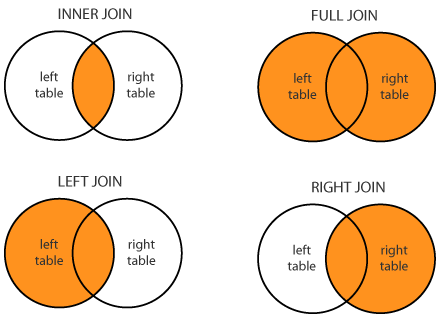

In [33]:
pd.read_sql_query("SELECT * FROM tracks LIMIT 10;",conn)

,TrackId,Name,AlbumId,MediaTypeId,GenreId,Composer,Milliseconds,Bytes,UnitPrice
0,1,For Those About To Rock (We Salute You),1,1,1,"Angus Young, Malcolm Young, Brian Johnson",343719,11170334,0.99
1,2,Balls to the Wall,2,2,1,None,342562,5510424,0.99
2,3,Fast As a Shark,3,2,1,"F. Baltes, S. Kaufman, U. Dirkscneider & W. Ho...",230619,3990994,0.99
3,4,Restless and Wild,3,2,1,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...",252051,4331779,0.99
4,5,Princess of the Dawn,3,2,1,Deaffy & R.A. Smith-Diesel,375418,6290521,0.99
5,6,Put The Finger On You,1,1,1,"Angus Young, Malcolm Young, Brian Johnson",205662,6713451,0.99
6,7,Let's Get It Up,1,1,1,"Angus Young, Malcolm Young, Brian Johnson",233926,7636561,0.99
7,8,Inject The Venom,1,1,1,"Angus Young, Malcolm Young, Brian Johnson",210834,6852860,0.99
8,9,Snowballed,1,1,1,"Angus Young, Malcolm Young, Brian Johnson",203102,6599424,0.99
9,10,Evil Walks,1,1,1,"Angus Young, Malcolm Young, Brian Johnson",263497,8611245,0.99


In [34]:
pd.read_sql_query("SELECT *  FROM genres;",conn)

,GenreId,Name
0,1,Rock
1,2,Jazz
2,3,Metal
3,4,Alternative & Punk
4,5,Rock And Roll
5,6,Blues
6,7,Latin
7,8,Reggae
8,9,Pop
9,10,Soundtrack


```
SELECT tracks.Name, genres.Name 
FROM tracks 
INNER JOIN genres ON tracks.GenreId = genres.GenreId
```

In [40]:
pd.read_sql_query("SELECT * FROM tracks INNER JOIN genres ON tracks.GenreId = genres.GenreId;", conn)

,TrackId,Name,AlbumId,MediaTypeId,GenreId,Composer,Milliseconds,Bytes,UnitPrice,GenreId,Name
0,1,For Those About To Rock (We Salute You),1,1,1,"Angus Young, Malcolm Young, Brian Johnson",343719,11170334,0.99,1,Rock
1,2,Balls to the Wall,2,2,1,None,342562,5510424,0.99,1,Rock
2,3,Fast As a Shark,3,2,1,"F. Baltes, S. Kaufman, U. Dirkscneider & W. Ho...",230619,3990994,0.99,1,Rock
3,4,Restless and Wild,3,2,1,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...",252051,4331779,0.99,1,Rock
4,5,Princess of the Dawn,3,2,1,Deaffy & R.A. Smith-Diesel,375418,6290521,0.99,1,Rock
5,6,Put The Finger On You,1,1,1,"Angus Young, Malcolm Young, Brian Johnson",205662,6713451,0.99,1,Rock
6,7,Let's Get It Up,1,1,1,"Angus Young, Malcolm Young, Brian Johnson",233926,7636561,0.99,1,Rock
7,8,Inject The Venom,1,1,1,"Angus Young, Malcolm Young, Brian Johnson",210834,6852860,0.99,1,Rock
8,9,Snowballed,1,1,1,"Angus Young, Malcolm Young, Brian Johnson",203102,6599424,0.99,1,Rock
9,10,Evil Walks,1,1,1,"Angus Young, Malcolm Young, Brian Johnson",263497,8611245,0.99,1,Rock


```
SELECT genreid, COUNT(*) 
FROM tracks 
GROUP BY genreid
```

In [37]:
pd.read_sql_query("SELECT genreid, COUNT(*) FROM tracks GROUP BY genreid;",conn)

,GenreId,COUNT(*)
0,1,1297
1,2,130
2,3,374
3,4,332
4,5,12
5,6,81
6,7,579
7,8,58
8,9,48
9,10,43


### INSERT

```
INSERT INTO table_name (column1, column2, column3, ...)
VALUES (value1, value2, value3, ...);
```

In [41]:
conn.execute("INSERT INTO genres (GenreId, Name) VALUES (28,'blahblah')")

In [42]:
pd.read_sql_query("SELECT *  FROM genres;",conn)

,GenreId,Name
0,1,Rock
1,2,Jazz
2,3,Metal
3,4,Alternative & Punk
4,5,Rock And Roll
5,6,Blues
6,7,Latin
7,8,Reggae
8,9,Pop
9,10,Soundtrack


### NULL

```
SELECT * 
FROM customers 
WHERE Fax IS NULL
```

In [46]:
res = pd.read_sql_query("SELECT * FROM customers WHERE Fax IS NULL",conn)
res.head(5)

,CustomerId,FirstName,LastName,Company,Address,City,State,Country,PostalCode,Phone,Fax,Email,SupportRepId


```
SELECT * 
FROM customers 
WHERE Fax IS NOT NULL
```

In [47]:
res = pd.read_sql_query("SELECT * FROM customers WHERE Fax IS NOT NULL",conn)
res.head(5)

,CustomerId,FirstName,LastName,Company,Address,City,State,Country,PostalCode,Phone,Fax,Email,SupportRepId
0,1,Luís,Gonçalves,Embraer - Empresa Brasileira de Aeronáutica S.A.,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br,3
1,5,František,Wichterlová,JetBrains s.r.o.,Klanova 9/506,Prague,None,Czech Republic,14700,+420 2 4172 5555,+420 2 4172 5555,frantisekw@jetbrains.com,4
2,10,Eduardo,Martins,Woodstock Discos,"Rua Dr. Falcão Filho, 155",São Paulo,SP,Brazil,01007-010,+55 (11) 3033-5446,+55 (11) 3033-4564,eduardo@woodstock.com.br,4
3,11,Alexandre,Rocha,Banco do Brasil S.A.,"Av. Paulista, 2022",São Paulo,SP,Brazil,01310-200,+55 (11) 3055-3278,+55 (11) 3055-8131,alero@uol.com.br,5
4,12,Roberto,Almeida,Riotur,"Praça Pio X, 119",Rio de Janeiro,RJ,Brazil,20040-020,+55 (21) 2271-7000,+55 (21) 2271-7070,roberto.almeida@riotur.gov.br,3


### UPDATE

```
UPDATE table_name
SET column1 = value1, column2 = value2, ...
WHERE condition;
```

In [48]:
conn.execute("UPDATE customers SET Fax = -1 WHERE Fax IS NULL")

In [49]:
pd.read_sql_query("SELECT * FROM customers WHERE Fax IS NULL",conn)

,CustomerId,FirstName,LastName,Company,Address,City,State,Country,PostalCode,Phone,Fax,Email,SupportRepId


### DELETE

```
DELETE FROM table_name
WHERE condition;
```

In [50]:
conn.execute("DELETE FROM customers WHERE Fax = -1")

In [51]:
pd.read_sql_query("SELECT * FROM customers WHERE Fax = -1",conn)

,CustomerId,FirstName,LastName,Company,Address,City,State,Country,PostalCode,Phone,Fax,Email,SupportRepId


### DATETIME

```
SELECT strftime('%Y', BirthDate), LastName 
FROM employees
```

In [52]:
pd.read_sql_query("SELECT * FROM employees",conn)

,EmployeeId,LastName,FirstName,Title,ReportsTo,BirthDate,HireDate,Address,City,State,Country,PostalCode,Phone,Fax,Email
0,1,Adams,Andrew,General Manager,NaN,1962-02-18 00:00:00,2002-08-14 00:00:00,11120 Jasper Ave NW,Edmonton,AB,Canada,T5K 2N1,+1 (780) 428-9482,+1 (780) 428-3457,andrew@chinookcorp.com
1,2,Edwards,Nancy,Sales Manager,1.0,1958-12-08 00:00:00,2002-05-01 00:00:00,825 8 Ave SW,Calgary,AB,Canada,T2P 2T3,+1 (403) 262-3443,+1 (403) 262-3322,nancy@chinookcorp.com
2,3,Peacock,Jane,Sales Support Agent,2.0,1973-08-29 00:00:00,2002-04-01 00:00:00,1111 6 Ave SW,Calgary,AB,Canada,T2P 5M5,+1 (403) 262-3443,+1 (403) 262-6712,jane@chinookcorp.com
3,4,Park,Margaret,Sales Support Agent,2.0,1947-09-19 00:00:00,2003-05-03 00:00:00,683 10 Street SW,Calgary,AB,Canada,T2P 5G3,+1 (403) 263-4423,+1 (403) 263-4289,margaret@chinookcorp.com
4,5,Johnson,Steve,Sales Support Agent,2.0,1965-03-03 00:00:00,2003-10-17 00:00:00,7727B 41 Ave,Calgary,AB,Canada,T3B 1Y7,1 (780) 836-9987,1 (780) 836-9543,steve@chinookcorp.com
5,6,Mitchell,Michael,IT Manager,1.0,1973-07-01 00:00:00,2003-10-17 00:00:00,5827 Bowness Road NW,Calgary,AB,Canada,T3B 0C5,+1 (403) 246-9887,+1 (403) 246-9899,michael@chinookcorp.com
6,7,King,Robert,IT Staff,6.0,1970-05-29 00:00:00,2004-01-02 00:00:00,590 Columbia Boulevard West,Lethbridge,AB,Canada,T1K 5N8,+1 (403) 456-9986,+1 (403) 456-8485,robert@chinookcorp.com
7,8,Callahan,Laura,IT Staff,6.0,1968-01-09 00:00:00,2004-03-04 00:00:00,923 7 ST NW,Lethbridge,AB,Canada,T1H 1Y8,+1 (403) 467-3351,+1 (403) 467-8772,laura@chinookcorp.com


In [54]:
pd.read_sql_query("SELECT strftime('%Y', BirthDate) As YearOfBirth, BirthDate, LastName FROM employees",conn)

,YearOfBirth,BirthDate,LastName
0,1962,1962-02-18 00:00:00,Adams
1,1958,1958-12-08 00:00:00,Edwards
2,1973,1973-08-29 00:00:00,Peacock
3,1947,1947-09-19 00:00:00,Park
4,1965,1965-03-03 00:00:00,Johnson
5,1973,1973-07-01 00:00:00,Mitchell
6,1970,1970-05-29 00:00:00,King
7,1968,1968-01-09 00:00:00,Callahan


### Άσκηση

Να βρεθούν οι συνολικές πωλήσεις ανά χρονιά, όπου το αποτέλεσμα θα είναι σαν την εικόνα

![alt text](ex1.png "Title")

#### Λύση
```
SELECT strftime('%Y', invoiceDate) As Year,SUM(Total) As TotalSales 
FROM invoices 
GROUP BY strftime('%Y', invoiceDate)

pd.read_sql_query("SELECT strftime('%Y', invoiceDate) As Year ,SUM(Total) As TotalSales FROM invoices GROUP BY strftime('%Y', invoiceDate)",conn)
```

### Άσκηση

Να βρεθούν τα 20 τραγούδια με τις περισσότερες πωλήσεις (και πόσες ήταν αυτές)

#### Λύση
```
SELECT tracks.Name, sum(invoice_items.quantity)
FROM invoice_items
INNER JOIN tracks ON tracks.trackId = invoice_items.trackId
GROUP BY invoice_items.trackId
ORDEF BY sum(invoice_items.quantity) DESC
LIMIT 20

pd.read_sql_query("SELECT tracks.Name, COUNT(*) FROM invoice_items INNER JOIN tracks ON tracks.trackId = invoice_items.trackId GROUP BY invoice_items.trackId ORDER BY count(*) DESC LIMIT 20",conn)
```


In [57]:
pd.read_sql_query("SELECT tracks.Name, SUM(invoice_items.quantity) FROM invoice_items INNER JOIN tracks ON tracks.trackId = invoice_items.trackId GROUP BY invoice_items.trackId ORDER BY count(*) DESC LIMIT 20",conn)

,Name,SUM(invoice_items.quantity)
0,Balls to the Wall,2
1,Inject The Venom,2
2,Snowballed,2
3,Overdose,2
4,Deuces Are Wild,2
5,Not The Doctor,2
6,Por Causa De Você,2
7,Welcome Home (Sanitarium),2
8,Snowblind,2
9,Cornucopia,2


### IF - ELSE

```
CASE case_expression
     WHEN when_expression_1 THEN result_1
     WHEN when_expression_2 THEN result_2
     ...
     [ ELSE result_else ] 
END
```

```
SELECT CASE 
        WHEN strftime('%m', invoiceDate) = '01' THEN 'January' 
        WHEN strftime('%m', invoiceDate) = '02' THEN 'February' 
        ELSE '...' 
       END AS Month, 
       invoiceDate 
FROM invoices
```

In [58]:
pd.read_sql_query("SELECT CASE WHEN strftime('%m', invoiceDate) = '01' THEN 'January' WHEN strftime('%m', invoiceDate) = '02' THEN 'February' ELSE '...' END AS Month, invoiceDate FROM invoices",conn)

,Month,InvoiceDate
0,January,2009-01-01 00:00:00
1,January,2009-01-02 00:00:00
2,January,2009-01-03 00:00:00
3,January,2009-01-06 00:00:00
4,January,2009-01-11 00:00:00
5,January,2009-01-19 00:00:00
6,February,2009-02-01 00:00:00
7,February,2009-02-01 00:00:00
8,February,2009-02-02 00:00:00
9,February,2009-02-03 00:00:00


```
SELECT SUM(CASE 
            WHEN strftime('%m', invoiceDate) = '01' THEN 1 
            ELSE 0 
           END) AS January, 
        SUM(CASE 
            WHEN strftime('%m', invoiceDate) = '02' THEN 1 
            ELSE 0 
        END) AS February
FROM invoices
```

In [59]:
pd.read_sql_query("SELECT SUM(CASE WHEN strftime('%m', invoiceDate) = '01' THEN 1 ELSE 0 END) AS January, SUM(CASE WHEN strftime('%m', invoiceDate) = '02' THEN 1 ELSE 0 END) AS February FROM invoices",conn)

,January,February
0,34,33
